In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
bruto_train = np.load("bruto_subj_1_session_0_train.npy")
bruto_labels_train = np.load("bruto_subj_1_session_0_labels_train.npy")
bruto_test = np.load("bruto_subj_1_session_0_test.npy")
bruto_labels_test = np.load("bruto_subj_1_session_0_labels_test.npy")
cca_train = np.load("cca_subj_1_session_0_train.npy")
cca_labels_train = np.load("cca_subj_1_session_0_labels_train.npy")
cca_test = np.load("cca_subj_1_session_0_test.npy")
cca_labels_test = np.load("cca_subj_1_session_0_labels_test.npy")

In [4]:
bruto_train.shape

(200, 9, 250)

In [5]:
bruto = np.append(bruto_train, bruto_test, axis=0)
bruto_labels = np.append(bruto_labels_train, bruto_labels_test, axis=0)

In [6]:
cca = np.append(cca_train, cca_test, axis=0)
cca_labels = np.append(cca_labels_train, cca_labels_test, axis=0)
cca.shape

(240, 8, 250)

In [ ]:
240 / 8

30.0

In [ ]:
bruto_labels = bruto_labels + 8

In [ ]:
cca_labels = cca_labels + 8
cca_labels

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,  8,  8,  8,  8,
        8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 13

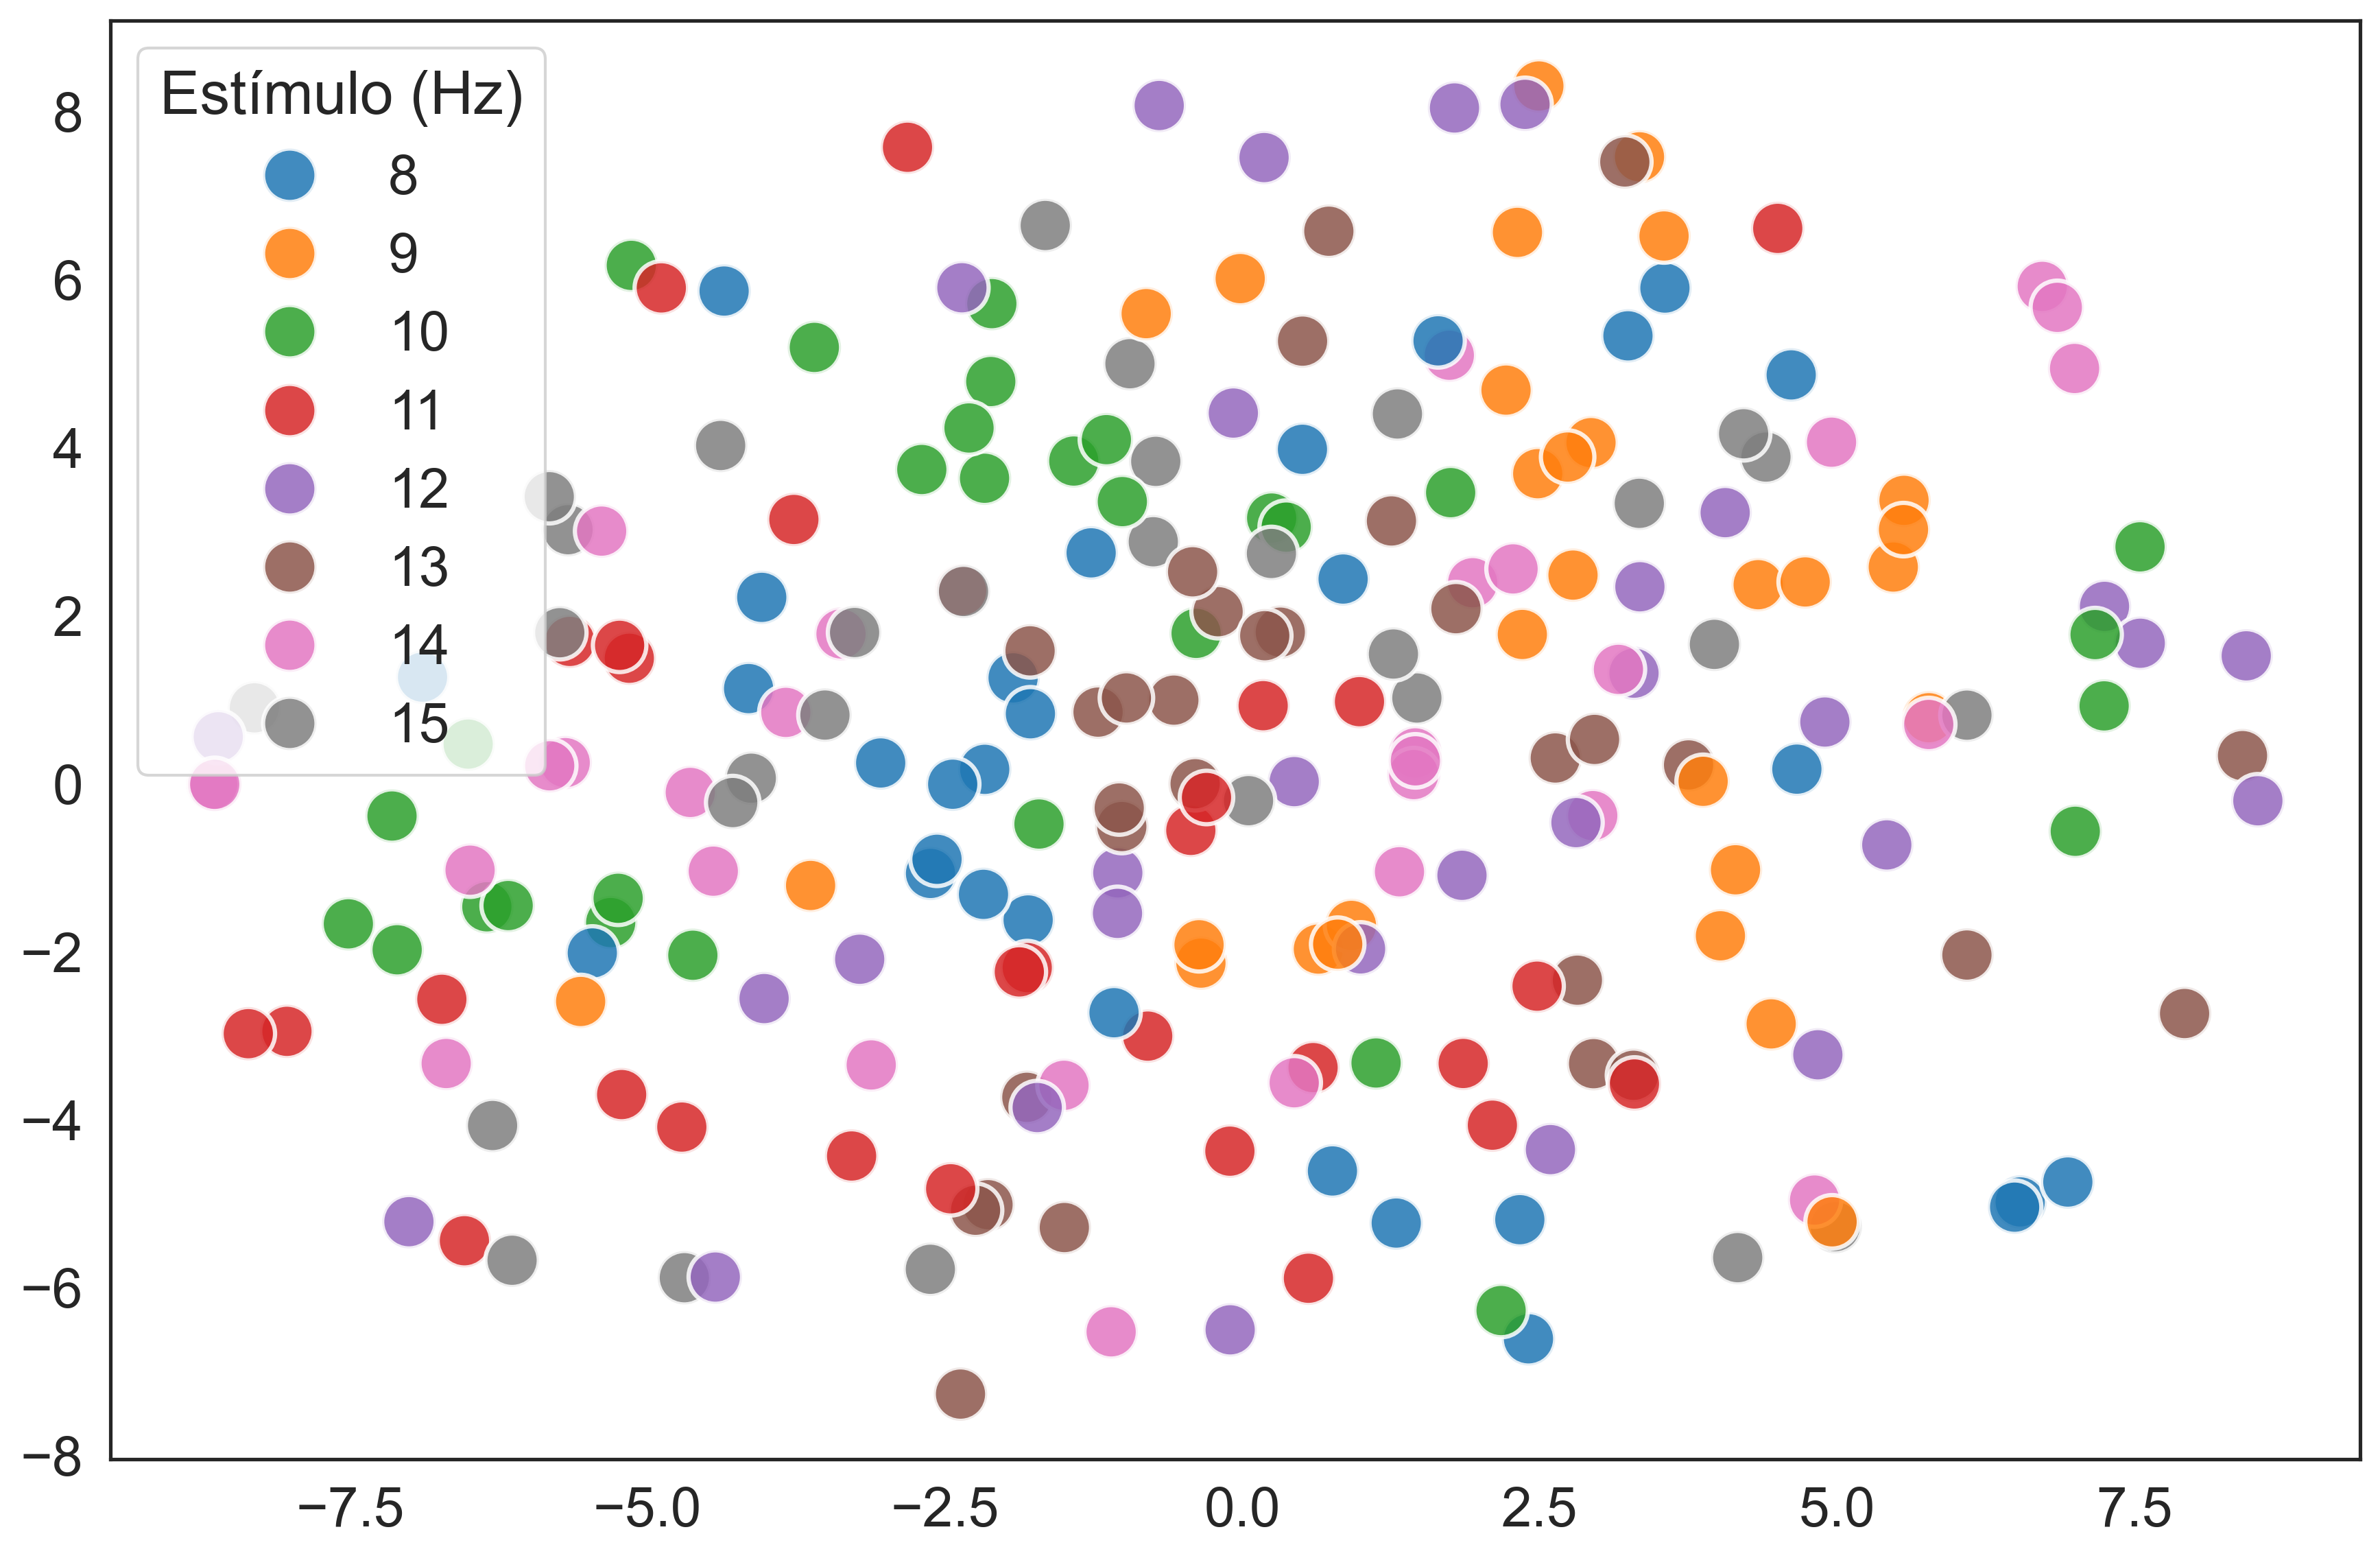

In [ ]:
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(
    bruto.reshape(bruto.shape[0], bruto.shape[1] * bruto.shape[2])
)

plt.figure(figsize=(12, 8), dpi=300)
sns.set_theme(style="white", font_scale=1.75)

scatter = sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=bruto_labels.astype(int),
    palette="tab10",
    s=350,
    edgecolor="w",
    alpha=0.85,
)

scatter.legend(title="Estímulo (Hz)", loc="upper left")
plt.tight_layout()
plt.show()

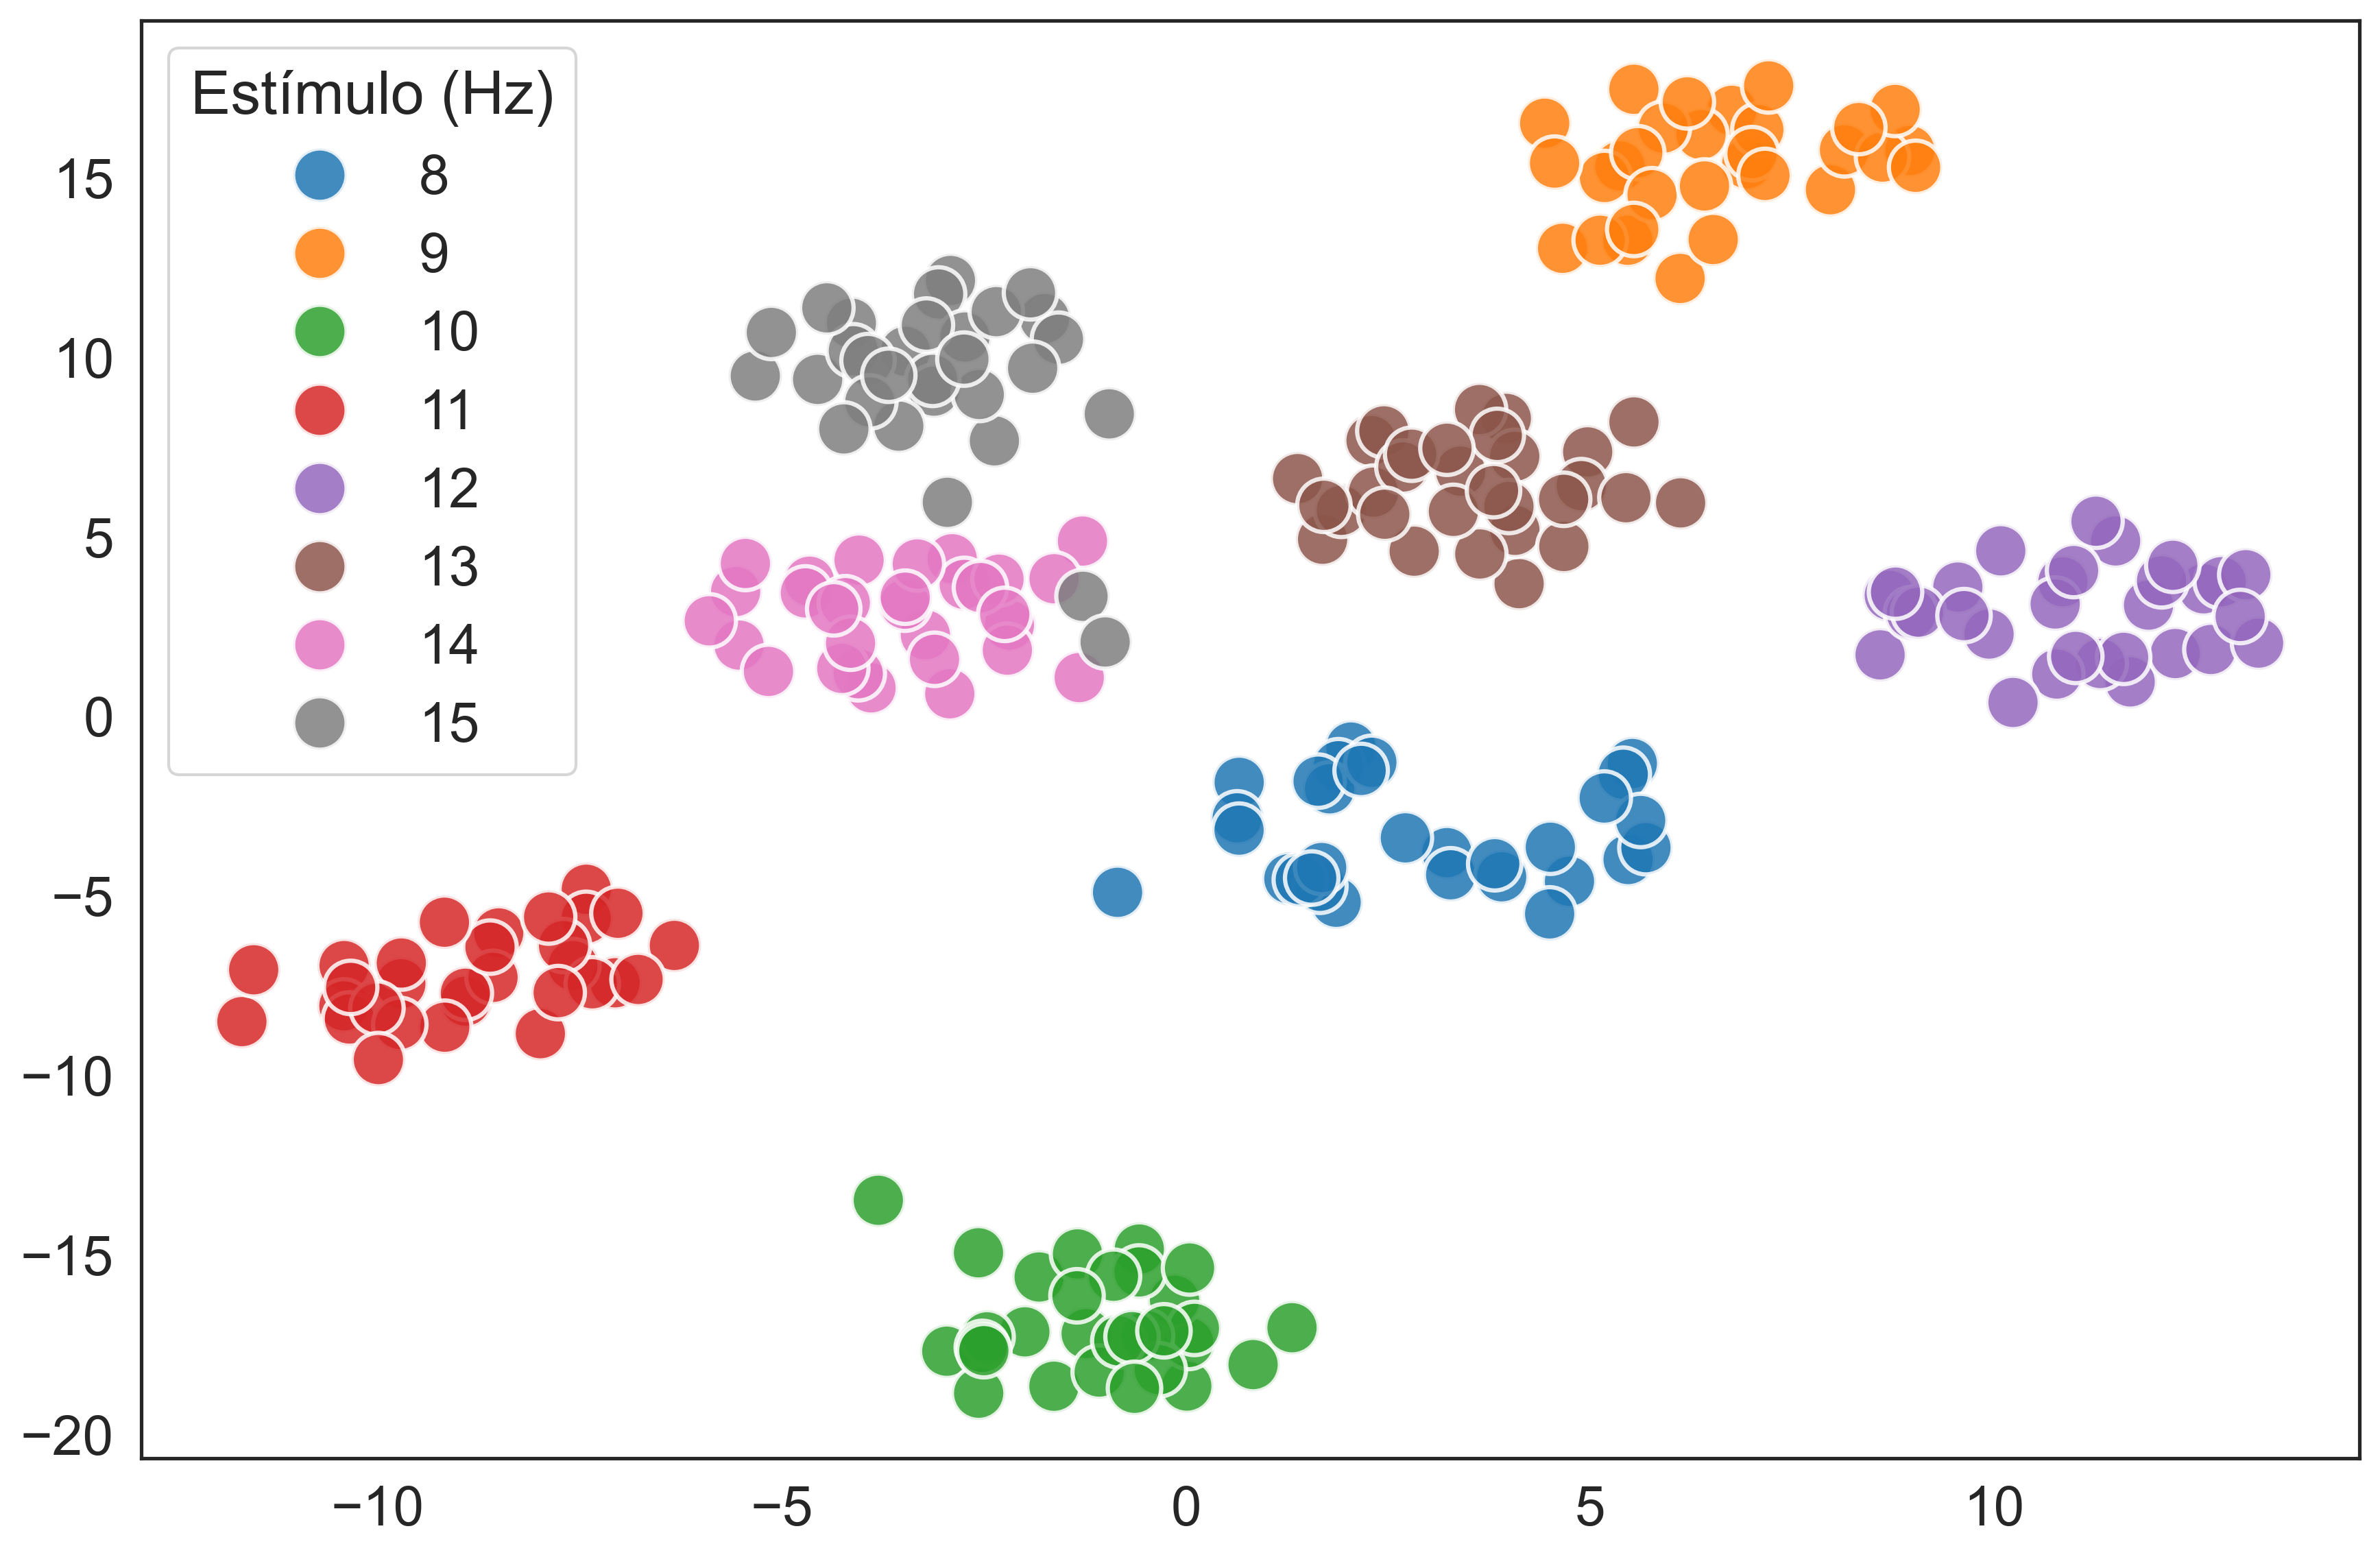

In [ ]:
import seaborn as sns

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(cca.reshape(cca.shape[0], cca.shape[1] * cca.shape[2]))

plt.figure(figsize=(12, 8), dpi=300)
sns.set_theme(style="white", font_scale=1.75)

scatter = sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=cca_labels.astype(int),
    palette="tab10",
    s=350,
    edgecolor="w",
    alpha=0.85,
)
scatter.legend(title="Estímulo (Hz)", loc="upper left")
plt.tight_layout()
plt.show()

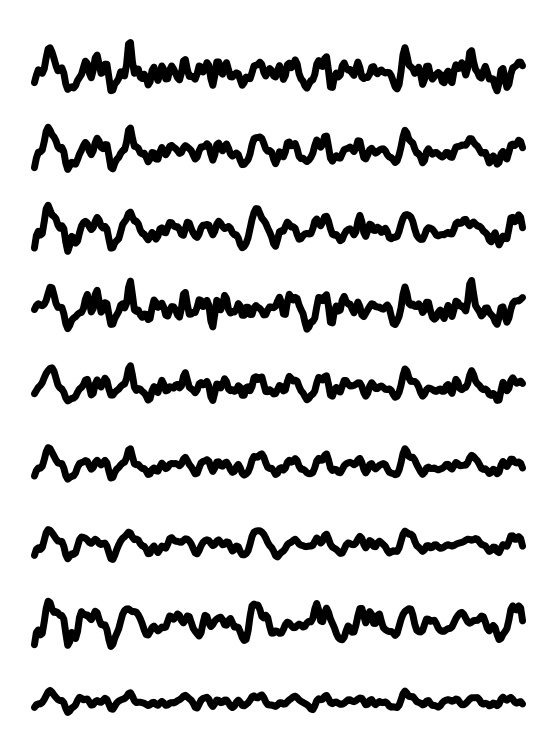

In [ ]:
data = bruto[0]

plt.figure(figsize=(6, 8))

offset = 4  # vertical offset between channels
for i in range(data.shape[0]):
    plt.plot(data[i] / 10 + i * offset, color="black", linewidth=5)

plt.axis("off")  # Remove axes
plt.tight_layout()
plt.show()

In [ ]:
data = cca[0:2].reshape(16, 250)
data.shape

(16, 250)

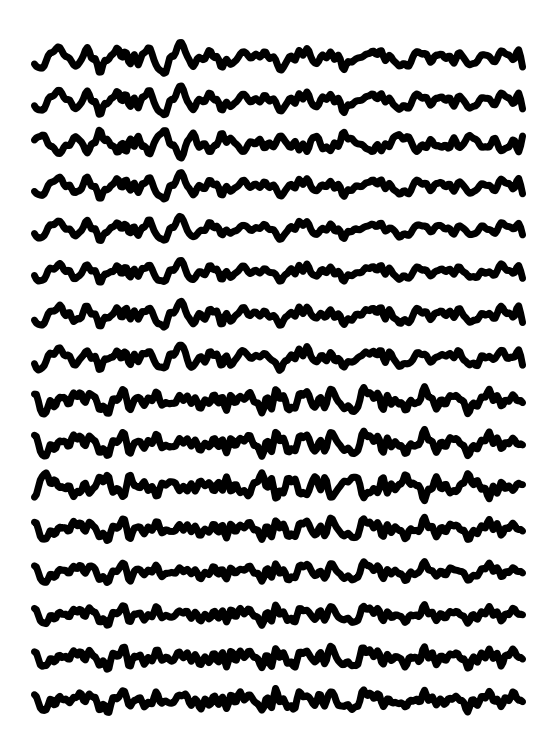

In [ ]:
data = cca[0:2].reshape(16, 250)

plt.figure(figsize=(6, 8))

offset = 4  # vertical offset between channels
for i in range(data.shape[0]):
    plt.plot(data[i] / 2 + i * offset, color="black", linewidth=5)

plt.axis("off")  # Remove axes
plt.tight_layout()
plt.show()

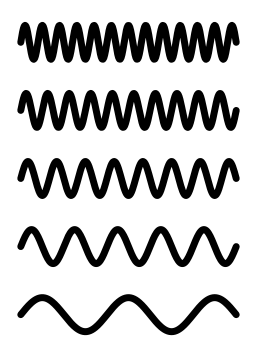

In [ ]:
# Generate x values
x = np.linspace(0, 5, 250)

# Create the data array with three channels
data = np.array(
    [
        np.sin(np.pi * x),
        np.sin(2 * np.pi * x),
        np.sin(3 * np.pi * x),
        np.sin(4 * np.pi * x),
        np.sin(5 * np.pi * x),
    ]
)

plt.figure(figsize=(3, 4))

offset = 4  # vertical offset between channels
for i in range(data.shape[0]):
    plt.plot(data[i] + i * offset, color="black", linewidth=5)

plt.axis("off")  # Remove axes
plt.tight_layout()
plt.show()